<a href="https://colab.research.google.com/github/BLANCO-17/CNN-ALZD/blob/main/ALZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

In [7]:
%cd /content/drive/MyDrive/kaggle_dataset/alz_mri/

/content/drive/MyDrive/kaggle_dataset/alz_mri


In [12]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle_dataset/alz_mri/"

In [15]:
!ls

alzheimer-mri-dataset.zip  kaggle.json


In [14]:
!kaggle datasets download -d sachinkumar413/alzheimer-mri-dataset

 93% 26.0M/28.0M [00:02<00:00, 20.0MB/s]
100% 28.0M/28.0M [00:02<00:00, 12.4MB/s]


In [ ]:
!unzip alzheimer-mri-dataset.zip

In [20]:
!ls "./Dataset"

Mild_Demented  Moderate_Demented  Non_Demented	Very_Mild_Demented


In [28]:
### CODE TINNNNNNNNGGGGGGGGGG

import tensorflow as tf
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


In [44]:
classes = {'Non_Demented':0, 'Moderate_Demented':1, 'Mild_Demented':2, 'Very_Mild_Demented':3}

images = []
labels = []

print(list(classes.keys()))
for x in list(classes.keys()):
  for f in glob.glob("./Dataset/"+x+"/*"):
      img = cv2.imread(f)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      images.append(img)
      labels.append(classes[x])


['Non_Demented', 'Moderate_Demented', 'Mild_Demented', 'Very_Mild_Demented']


In [33]:
images[0].shape

(128, 128)

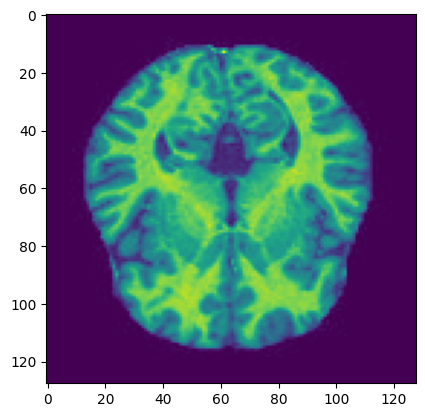

In [34]:
plt.imshow(images[20])

In [45]:
### Convert images to np array
images = np.array(images)/255.0
labels = np.array(labels)

In [65]:
labels[2000]

3

In [47]:
images, labels = shuffle(images, labels)

In [48]:
train_set = images[:int(len(images)*.65)]
val_set = images[int(len(images)*.65) : int(len(images)*.75)]
test_set = images[int(len(images)*.75):]

len(train_set), len(test_set), len(val_set)

(4160, 1600, 640)

In [51]:
train_lab = labels[:int(len(labels)*.65)]
val_lab = labels[int(len(labels)*.65) : int(len(labels)*.75)]
test_lab = labels[int(len(labels)*.75):]

len(train_lab), len(test_lab), len(val_lab)

(4160, 1600, 640)

In [49]:
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)))
model_1.add(tf.keras.layers.MaxPooling2D((2,2)))
model_1.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model_1.add(tf.keras.layers.MaxPooling2D((2,2)))
model_1.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model_1.add(tf.keras.layers.MaxPooling2D((2,2)))
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(16, activation='relu'))
model_1.add(tf.keras.layers.Dense(4, activation='softmax'))

model_1.compile(optimizer='adam',
                metrics=['accuracy'],
                loss=tf.keras.losses.sparse_categorical_crossentropy)

In [53]:
model_1.fit(train_set, train_lab, epochs=25)

Epoch 1/25
130/130 [==============================] - 2s 15ms/step - loss: 0.1815 - accuracy: 0.9567
Epoch 2/25
130/130 [==============================] - 2s 14ms/step - loss: 0.1313 - accuracy: 0.9784
Epoch 3/25
130/130 [==============================] - 2s 14ms/step - loss: 0.1137 - accuracy: 0.9827
Epoch 4/25
130/130 [==============================] - 2s 15ms/step - loss: 0.1104 - accuracy: 0.9825
Epoch 5/25
130/130 [==============================] - 2s 15ms/step - loss: 0.0959 - accuracy: 0.9863
Epoch 6/25
130/130 [==============================] - 2s 14ms/step - loss: 0.0876 - accuracy: 0.9865
Epoch 7/25
130/130 [==============================] - 2s 14ms/step - loss: 0.0834 - accuracy: 0.9868
Epoch 8/25
130/130 [==============================] - 2s 14ms/step - loss: 0.0787 - accuracy: 0.9873
Epoch 9/25
130/130 [==============================] - 2s 14ms/step - loss: 0.1412 - accuracy: 0.9620
Epoch 10/25
130/130 [==============================] - 2s 14ms/step - loss: 0.0852 - accura

In [54]:
model_1.evaluate(test_set, test_lab)

50/50 [==============================] - 0s 6ms/step - loss: 0.1694 - accuracy: 0.9450


[0.16944696009159088, 0.9449999928474426]

In [106]:
from random import randint

def plot_pred():
  x = randint(0, len(val_set))
  pred = model_1.predict(np.array([val_set[x]]))
  output=np.argmax(pred)
  acc=np.max(pred)*100.0

  plt.imshow(val_set[x], cmap=plt.cm.gray)
  plt.xlabel("Prediction : "+list(classes.keys())[output] +
             "\n Actual : "+list(classes.keys())[val_lab[x]] +
             "\n Accuracy : "+str(acc)[:4])


1/1 [==============================] - 0s 22ms/step


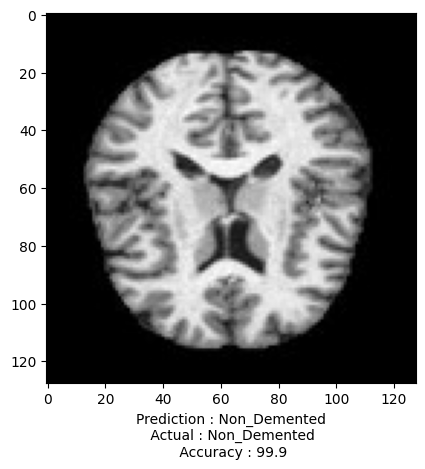

In [116]:
plot_pred()